In [2]:
import sys
import random
import numpy as np
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
import ipyvolume as ipv
from tyssue.draw import sheet_view

from IPython.display import Image
from scipy import optimize


from tyssue import config, Sheet, SheetGeometry, History, EventManager
from tyssue import SheetGeometry as geom
from tyssue import PlanarGeometry as geom
from tyssue.draw.plt_draw import create_gif
from tyssue.draw.plt_draw import plot_forces
from tyssue.draw import sheet_view
from tyssue.dynamics import effectors, model_factory
from tyssue.dynamics import PlanarModel
from tyssue.dynamics import SheetModel as model
from tyssue.generation import three_faces_sheet
from tyssue.solvers.viscous import EulerSolver
from tyssue.solvers.quasistatic import QSSolver
from tyssue.draw import sheet_view
from tyssue.draw.plt_draw import plot_forces
from tyssue.io import hdf5
import copy

from tyssue.geometry.planar_geometry import PlanarGeometry as geom
from tyssue.solvers.quasistatic import QSSolver
from tyssue.dynamics.planar_vertex_model import PlanarModel as model


from tyssue.stores import load_datasets

from tyssue.topology.sheet_topology import remove_face, cell_division

import warnings
warnings.filterwarnings('ignore')

C++ extension are not available for this version
collision solver could not be imported You may need to install CGAL and re-install tyssue


In [1]:
def line_tension_range(cellmap, lower_line_tension, higher_line_tension):
    for edge in range(len(cellmap.edge_df)):
        newValue = random.randrange(lower_line_tension, higher_line_tension)/100
        cellmap.edge_df['line_tension'][edge] = newValue         
    return cellmap

In [4]:
def change_specs(cellmap_original, geom_original, model_original, history_original, face_elasticity,
                 prefered_area, lower_line_tension, higher_line_tension, endTime):
    
   
    cellmap_original.update_specs(config.dynamics.quasistatic_plane_spec())
    #history_original = History(cellmap_original, extra_cols={"edge":["dx", "dy"]})

    cellmap_original.face_df["face_elasticity"] = face_elasticity
    cellmap_original.face_df["prefered_area"] = cellmap_original.face_df["area"].mean()*prefered_area

    cellmap_original.vert_df["viscosity"] = 1    
    
    cellmap_original.face_df["perimeter_elasticity"] = 0
    cellmap_original.face_df["contractility"] = 0
    
    cellmap_original = line_tension_range(cellmap_original, lower_line_tension, higher_line_tension)

    
    
    solver1 = EulerSolver(cellmap_original, geom_original, model_original, history=history_original, auto_reconnect=True)
    res1 = solver1.solve(tf=endTime, dt=0.05)
    
    cellmap_new = copy.deepcopy(cellmap_original)
    geom_new = copy.deepcopy(geom_original)
    model_new = copy.deepcopy(model_original)
    history_new = copy.deepcopy(history_original)
    
    return [cellmap_new, geom_new, model_new, history_new]
    

In [5]:
## Definition of the sheet
geom_original  = SheetGeometry # This may need to change
model_original = model_factory([    
    effectors.FaceAreaElasticity,
    effectors.LineTension
    ]) 
cellmap_original = Sheet.planar_sheet_3d('cellmap_original', 20, 20, 1, 1) # This may need to change
cellmap_original.sanitize ( trim_borders=True, order_edges=True )
geom_original.update_all(cellmap_original)

history_original = History(cellmap_original, extra_cols={"edge":["dx", "dy"]})

## Homeostasis

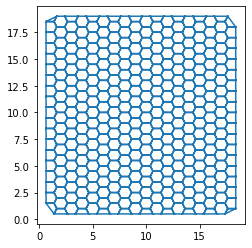

In [6]:
fig, ax = sheet_view(cellmap_original, ['y', 'x'], mode='quick')

## Homeostasis

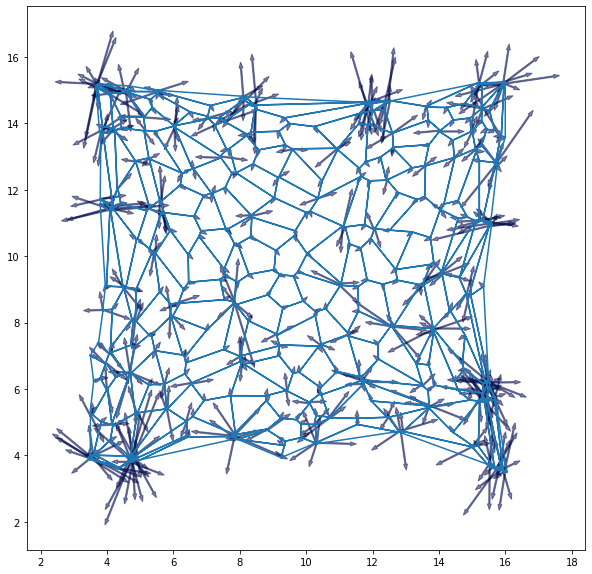

In [15]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 10, prefered_area = 0.6, lower_line_tension = 1, 
                                                       higher_line_tension = 100, endTime = 30)
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
fig.set_size_inches(10, 10)

In [156]:
print(cellmap_H.edge_df["line_tension"])
print(cellmap_H.face_df["area"].mean())

edge
0       0.40
1       0.55
2       0.64
3       0.26
4       0.51
        ... 
1929    0.08
1930    0.91
1931    0.08
1932    0.88
1933    0.36
Name: line_tension, Length: 1934, dtype: float64
0.3748125166129689


In [ ]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 10, prefered_area = 0.6, lower_line_tension = 1, 
                                                       higher_line_tension = 10, endTime = 20)
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
fig.set_size_inches(10, 10)

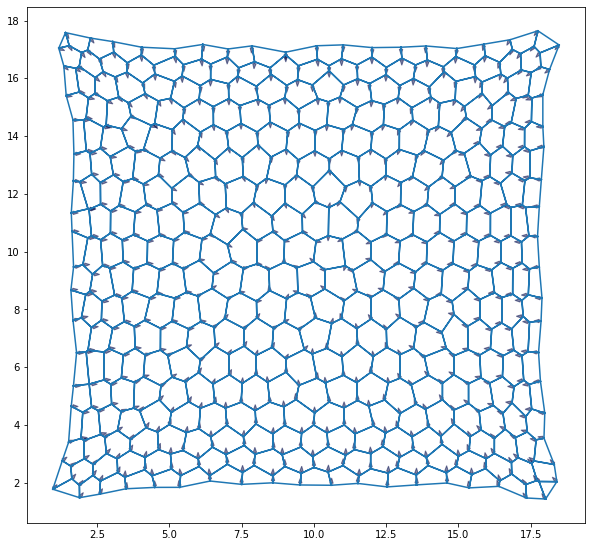

In [8]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 10, prefered_area = 0.6, lower_line_tension = 10, 
                                                       higher_line_tension = 20, endTime = 10)
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
fig.set_size_inches(10, 10)

In [9]:
print(cellmap_H.edge_df["line_tension"])
print(cellmap_H.face_df["area"].mean())

edge
0       0.19
1       0.17
2       0.16
3       0.10
4       0.17
        ... 
1969    0.12
1970    0.15
1971    0.13
1972    0.13
1973    0.10
Name: line_tension, Length: 1974, dtype: float64
0.7332200166294189


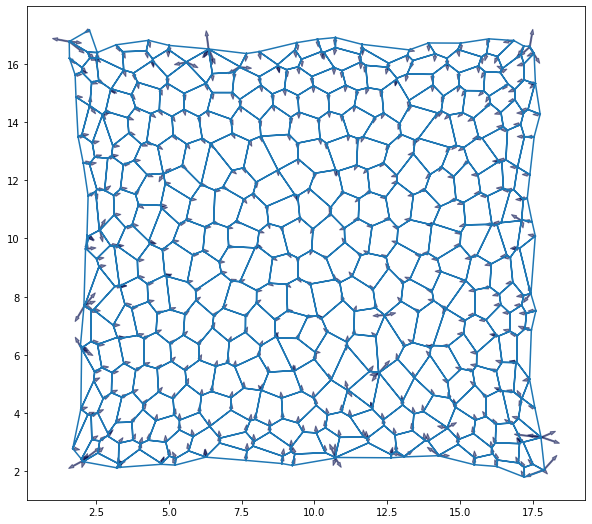

In [82]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 10, prefered_area = 0.6, lower_line_tension = 10, 
                                                       higher_line_tension = 50, endTime = 10)
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
fig.set_size_inches(10, 10)

In [84]:
print(cellmap_H.edge_df["line_tension"])
print(cellmap_H.face_df["area"].mean())

edge
0       0.23
1       0.48
2       0.32
3       0.35
4       0.17
        ... 
1920    0.40
1921    0.23
1922    0.22
1923    0.12
1924    0.49
Name: line_tension, Length: 1925, dtype: float64
0.6563229582443812


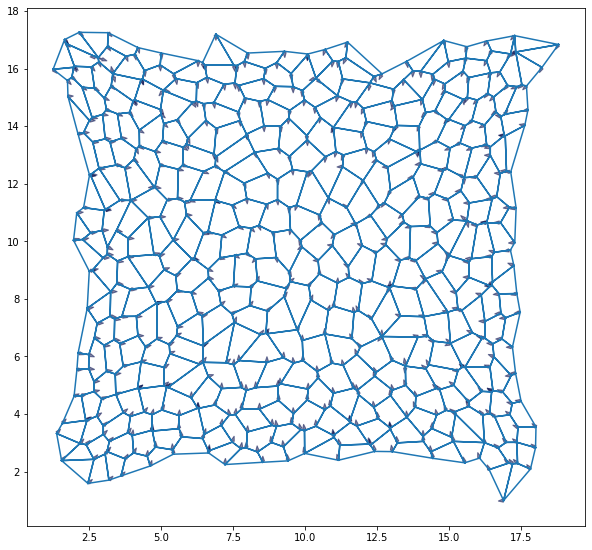

In [94]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 10, prefered_area = 0.6, lower_line_tension = 10, 
                                                       higher_line_tension = 250, endTime = 20)
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
fig.set_size_inches(10, 10)

In [96]:
print(cellmap_H.edge_df["line_tension"])
print(cellmap_H.face_df["area"].mean())

edge
0       0.060
1       0.018
2       0.116
3       0.174
4       0.010
        ...  
1880    0.101
1881    0.138
1882    0.164
1883    0.235
1884    0.138
Name: line_tension, Length: 1885, dtype: float64
0.6579073831048002


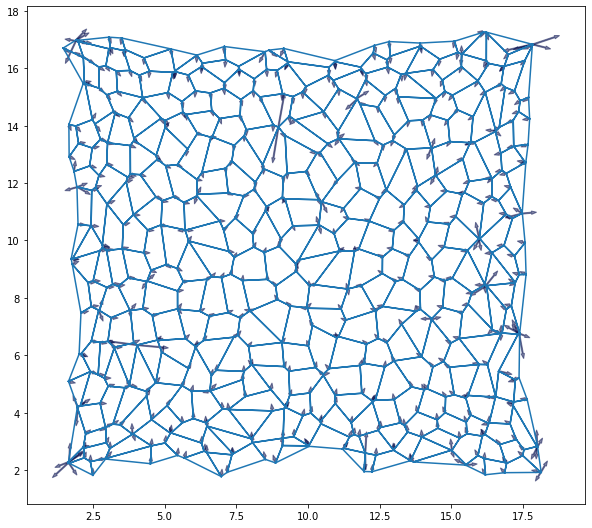

In [100]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 10, prefered_area = 0.6, lower_line_tension = 10, 
                                                       higher_line_tension = 500, endTime = 10)
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
fig.set_size_inches(10, 10)

In [102]:
print(cellmap_H.edge_df["line_tension"])
print(cellmap_H.face_df["area"].mean())

edge
0       0.420
1       0.379
2       0.258
3       0.105
4       0.056
        ...  
1862    0.270
1863    0.306
1864    0.355
1865    0.092
1866    0.057
Name: line_tension, Length: 1867, dtype: float64
0.6737595615634436


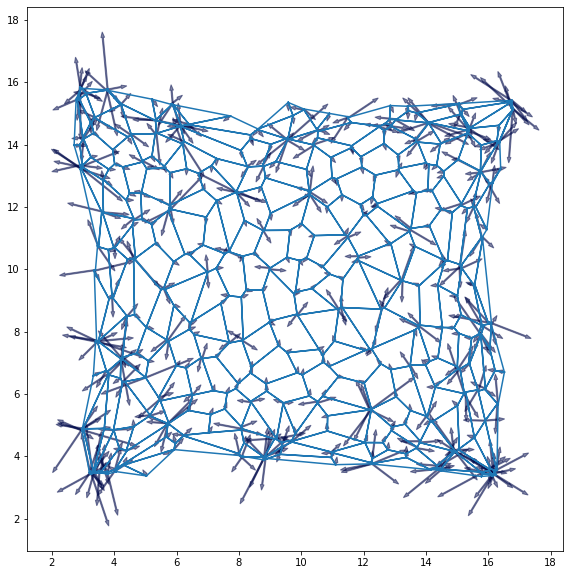

In [106]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 10, prefered_area = 0.6, lower_line_tension = 10, 
                                                       higher_line_tension = 1000, endTime = 20)
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
fig.set_size_inches(10, 10)

In [108]:
print(cellmap_H.edge_df["line_tension"])
print(cellmap_H.face_df["area"].mean())

edge
0       0.200
1       0.277
2       0.615
3       0.490
4       0.310
        ...  
1909    0.107
1910    0.239
1911    0.426
1912    0.826
1913    0.738
Name: line_tension, Length: 1914, dtype: float64
0.44463266987869


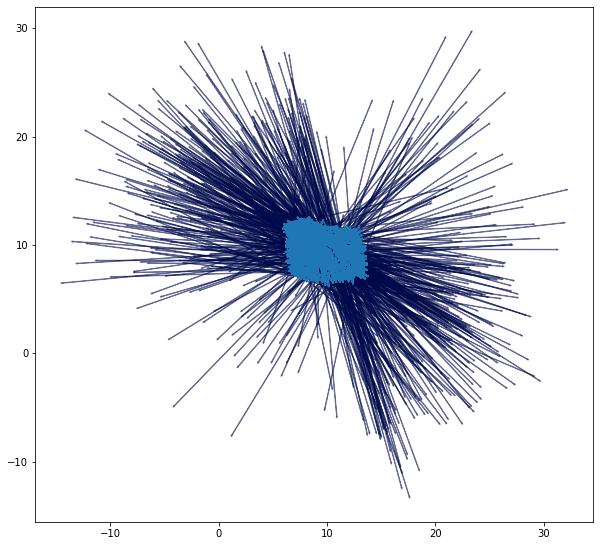

In [113]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 10, prefered_area = 0.6, lower_line_tension = 10, 
                                                       higher_line_tension = 10000, endTime = 30)
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
fig.set_size_inches(10, 10)

In [114]:
print(cellmap_H.edge_df["line_tension"])
print(cellmap_H.face_df["area"].mean())

edge
0       6.365
1       5.935
2       6.745
3       2.285
4       0.543
        ...  
1971    0.123
1972    2.228
1973    2.368
1974    9.763
1975    3.196
Name: line_tension, Length: 1976, dtype: float64
0.2284130442437008
